In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

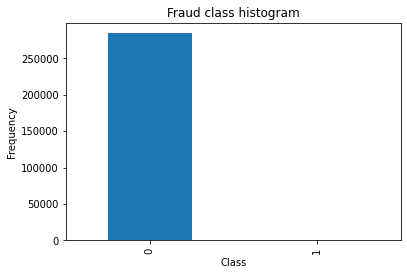

In [35]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
# print(count_classes)
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [36]:
from sklearn.preprocessing import StandardScaler #预处理标准化模块
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [37]:
X= data.iloc[:,data.columns != 'Class']
y= data.iloc[:,data.columns == 'Class']

number_records_fraud = len(data[data.Class == 1]) #Class=1的个数
fraud_indices = np.array(data[data.Class == 1].index)

normal_indices = data[data.Class ==0].index #Class=0的所有索引

random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices]) #下采样

under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

print('Percentage of normal transactions:',len(under_sample_data[under_sample_data.Class ==0])/len(under_sample_data))
print('Percentage of fraud transactions:',len(under_sample_data[under_sample_data.Class ==1])/len(under_sample_data))
print('Total number of transcations in resampled data:',len(under_sample_data))

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transcations in resampled data: 984


In [38]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#whole dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

print('Number transactions train dataset:',len(X_train))
print('Number transactions test dataset:',len(X_test))
print('Total number of transactions:',len(X_train)+len(X_test))

#undersampled dataset
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(X_undersample,y_undersample,test_size = 0.3,random_state = 0)

print('')
print('Number transactions train dataset:',len(X_train_undersample))
print('Number transactions test dataset:',len(X_test_undersample))
print('Total number of transactions:',len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset: 199364
Number transactions test dataset: 85443
Total number of transactions: 284807

Number transactions train dataset: 688
Number transactions test dataset: 296
Total number of transactions: 984


In [40]:
#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [41]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) #len(y_train_data)
    c_param_range = [0.01,0.1,1,10,100] #正则化惩罚项
    
    results_table = pd.DataFrame(index=range(len(c_param_range),2),columns=['C_param','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('----------------------------------------')
        print('C parameter:',c_param)
        print('----------------------------------------')
        print('')
        
        recall_accs = []
        for iteration,indices in enumerate(fold.split(y_train_data),start=1):
            #实例化模型对象
            lr = LogisticRegression(C=c_param,penalty='l2') #l1惩罚：w的绝对值
            
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values) #预测
            
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration',iteration,':recall score = ',recall_acc)
            
        results_table.loc[j,'Mean recall score']=np.mean(recall_accs)
        j+=1
        print('')
        print('Mean recall score',np.mean(recall_accs))
        print('')
        
    best_c = results_table.loc[results_table['Mean recall score'].astype('float64').idxmax()]['C_parameter']
    
    print('***********************************************')
    print('Best model to choose from cross validation is with C parameter=',best_c)
    print('***********************************************')
    
    return best_c

In [42]:
import warnings
warnings.filterwarnings("ignore") #忽略版本问题

best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

----------------------------------------
C parameter: 0.01
----------------------------------------

Iteration 1 :recall score =  0.821917808219178
Iteration 2 :recall score =  0.8493150684931506
Iteration 3 :recall score =  0.9152542372881356
Iteration 4 :recall score =  0.9324324324324325
Iteration 5 :recall score =  0.8787878787878788

Mean recall score 0.8795414850441551

----------------------------------------
C parameter: 0.1
----------------------------------------

Iteration 1 :recall score =  0.8493150684931506
Iteration 2 :recall score =  0.863013698630137
Iteration 3 :recall score =  0.9661016949152542
Iteration 4 :recall score =  0.9459459459459459
Iteration 5 :recall score =  0.8939393939393939

Mean recall score 0.9036631603847762

----------------------------------------
C parameter: 1
----------------------------------------

Iteration 1 :recall score =  0.8767123287671232
Iteration 2 :recall score =  0.863013698630137
Iteration 3 :recall score =  0.9491525423728814
It

In [43]:
import warnings
warnings.filterwarnings("ignore") #忽略版本问题

best_c = printing_Kfold_scores(X_train,y_train)

----------------------------------------
C parameter: 0.01
----------------------------------------

Iteration 1 :recall score =  0.5373134328358209
Iteration 2 :recall score =  0.6164383561643836
Iteration 3 :recall score =  0.6666666666666666
Iteration 4 :recall score =  0.6
Iteration 5 :recall score =  0.5

Mean recall score 0.5840836911333742

----------------------------------------
C parameter: 0.1
----------------------------------------

Iteration 1 :recall score =  0.5522388059701493
Iteration 2 :recall score =  0.6164383561643836
Iteration 3 :recall score =  0.7166666666666667
Iteration 4 :recall score =  0.6153846153846154
Iteration 5 :recall score =  0.5625

Mean recall score 0.612645688837163

----------------------------------------
C parameter: 1
----------------------------------------

Iteration 1 :recall score =  0.5522388059701493
Iteration 2 :recall score =  0.6164383561643836
Iteration 3 :recall score =  0.7333333333333333
Iteration 4 :recall score =  0.61538461538

In [45]:
import itertools
def plot_confusion_matrix(cm,classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 0.9115646258503401


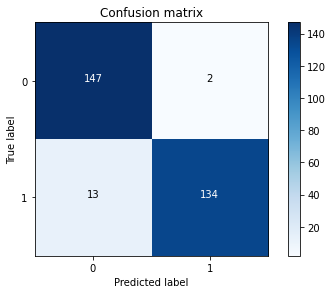

In [46]:
lr = LogisticRegression(C=best_c,penalty='l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values) 

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)
    
print('Recall metric in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 0.9863945578231292
Recall metric in the testing dataset: 0.9523809523809523
Recall metric in the testing dataset: 0.9319727891156463
Recall metric in the testing dataset: 0.891156462585034
Recall metric in the testing dataset: 0.8707482993197279
Recall metric in the testing dataset: 0.8571428571428571
Recall metric in the testing dataset: 0.8435374149659864
Recall metric in the testing dataset: 0.8163265306122449
Recall metric in the testing dataset: 0.7755102040816326


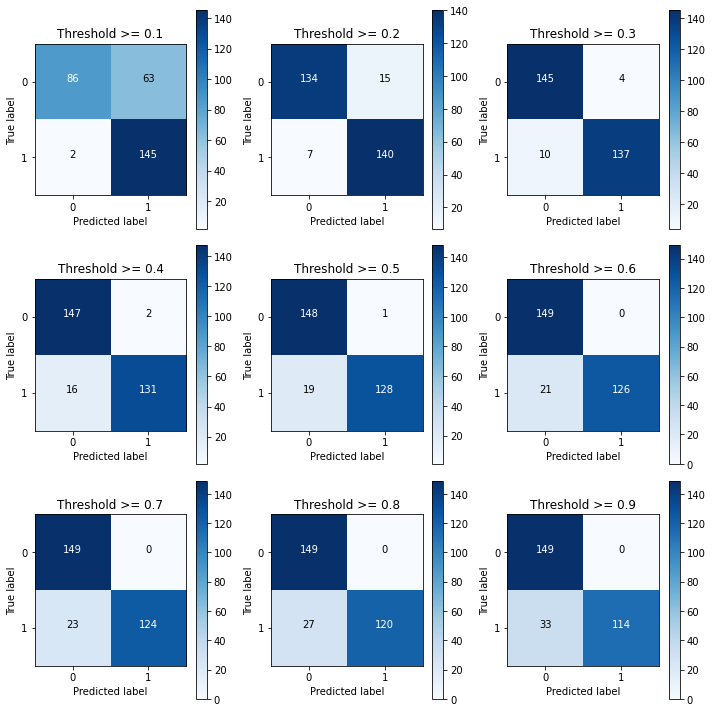

In [47]:
lr = LogisticRegression(C=0.01,penalty='l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values) 

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))

j=1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j+=1
    
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print('Recall metric in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,classes=class_names,title='Threshold >= %s'%i)

In [48]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

credit_cards = pd.read_csv('creditcard.csv')
columns = credit_cards.columns
features_columns=columns.delete(len(columns)-1)
features=credit_cards[features_columns]
labels=credit_cards['Class']

In [49]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.2,random_state=0)

In [50]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [51]:
len(os_labels[os_labels==1])

227454

In [52]:
os_features=pd.DataFrame(os_features)
os_labels=pd.DataFrame(os_labels)
best_c=printing_Kfold_scores(os_features,os_labels)

----------------------------------------
C parameter: 0.01
----------------------------------------

Iteration 1 :recall score =  0.8838709677419355
Iteration 2 :recall score =  0.875
Iteration 3 :recall score =  0.963837556711298
Iteration 4 :recall score =  0.9544410371396226
Iteration 5 :recall score =  0.9524186368582451

Mean recall score 0.9259136396902203

----------------------------------------
C parameter: 0.1
----------------------------------------

Iteration 1 :recall score =  0.8903225806451613
Iteration 2 :recall score =  0.875
Iteration 3 :recall score =  0.9441850171517097
Iteration 4 :recall score =  0.9547707763159341
Iteration 5 :recall score =  0.9552214198568932

Mean recall score 0.9238999587939396

----------------------------------------
C parameter: 1
----------------------------------------

Iteration 1 :recall score =  0.8838709677419355
Iteration 2 :recall score =  0.875
Iteration 3 :recall score =  0.9441850171517097
Iteration 4 :recall score =  0.95485870

Recall metric in the testing dataset: 0.8910891089108911


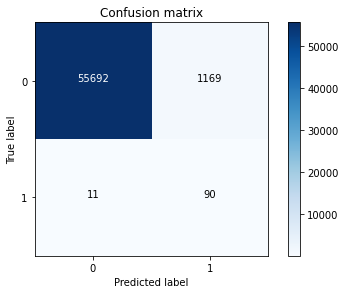

In [54]:
lr = LogisticRegression(C=best_c,penalty='l2')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print('Recall metric in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()